In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
#dataset https://www.kaggle.com/datasets/noriuk/us-educational-finances

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session



states=pd.read_csv('/kaggle/input/us-educational-finances/states.csv')

/kaggle/input/us-educational-finances/districts.csv
/kaggle/input/us-educational-finances/main.py
/kaggle/input/us-educational-finances/create_districts_csv.py
/kaggle/input/us-educational-finances/school15doc.pdf
/kaggle/input/us-educational-finances/requirements.txt
/kaggle/input/us-educational-finances/create_states_csv.py
/kaggle/input/us-educational-finances/naep.csv
/kaggle/input/us-educational-finances/states.csv
/kaggle/input/us-educational-finances/create_naep_csv.py
/kaggle/input/us-educational-finances/elsect/elsect/elsec12t.xls
/kaggle/input/us-educational-finances/elsect/elsect/elsec14t.xls
/kaggle/input/us-educational-finances/elsect/elsect/elsec03t.xls
/kaggle/input/us-educational-finances/elsect/elsect/elsec10t.xls
/kaggle/input/us-educational-finances/elsect/elsect/elsec13t.xls
/kaggle/input/us-educational-finances/elsect/elsect/elsec06t.xls
/kaggle/input/us-educational-finances/elsect/elsect/elsec96t.xls
/kaggle/input/us-educational-finances/elsect/elsect/elsec05t.xls

In [3]:
print(states.isnull().sum())

STATE                            0
YEAR                             0
ENROLL                          51
TOTAL_REVENUE                    0
FEDERAL_REVENUE                  0
STATE_REVENUE                    0
LOCAL_REVENUE                    0
TOTAL_EXPENDITURE                0
INSTRUCTION_EXPENDITURE          0
SUPPORT_SERVICES_EXPENDITURE     0
OTHER_EXPENDITURE               51
CAPITAL_OUTLAY_EXPENDITURE       0
dtype: int64


In [4]:
#missing values 
df = states.fillna(states.mean())

In [5]:
# Select the relevant columns from the DataFrame
df_p = df[['YEAR', 'TOTAL_REVENUE']]

# Filter the DataFrame to only include data from the years 1992 to 2016
df_p = df_p[df_p['YEAR'].between(1992, 2016)]

In [6]:
df_p['PRESIDENT'] = df_p['YEAR'].apply(lambda x: 'Bill Clinton' if 1992 <= x <= 2001 else ('George W. Bush' if 2001 <= x <= 2009 else 'Barack Obama'))

In [8]:
df_grouped=df_p.groupby('PRESIDENT')['TOTAL_REVENUE'].sum()
df_presidents=df_grouped.to_frame()

In [9]:
df_presidents['TENURE'] = df_presidents.index.to_series().apply(lambda x: 8 if x == 'Bill Clinton' else (8 if x == 'George W. Bush' else 8))

                TOTAL_REVENUE  TENURE
PRESIDENT                            
Barack Obama       4389589080       8
Bill Clinton       3085703659       8
George W. Bush     4129814546       8


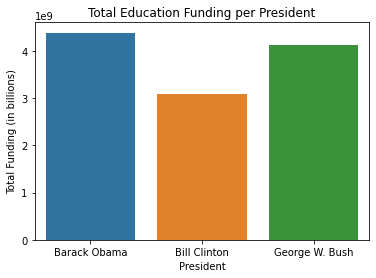

In [10]:
df_presidents.index.name='PRESIDENT'

sns.barplot(data=df_presidents,x=df_presidents.index,y='TOTAL_REVENUE')


# Add a title and axis labels
plt.title('Total Education Funding per President')
plt.xlabel('President')
plt.ylabel('Total Funding (in billions)')

# Print the resulting DataFrame
print(df_presidents)

# Show the plot
plt.show()

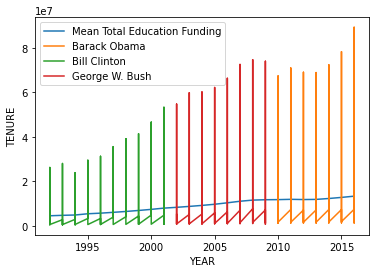

In [11]:
mean_by_year=df.groupby('YEAR')['TOTAL_REVENUE'].mean()
plt.plot(mean_by_year, label='Mean Total Education Funding')

for p, g in df_p.groupby('PRESIDENT'):
    plt.plot(g['YEAR'], g['TOTAL_REVENUE'],label=p)
    
    
plt.legend()
plt.xlabel('YEAR')
plt.ylabel('TENURE')
plt.show()

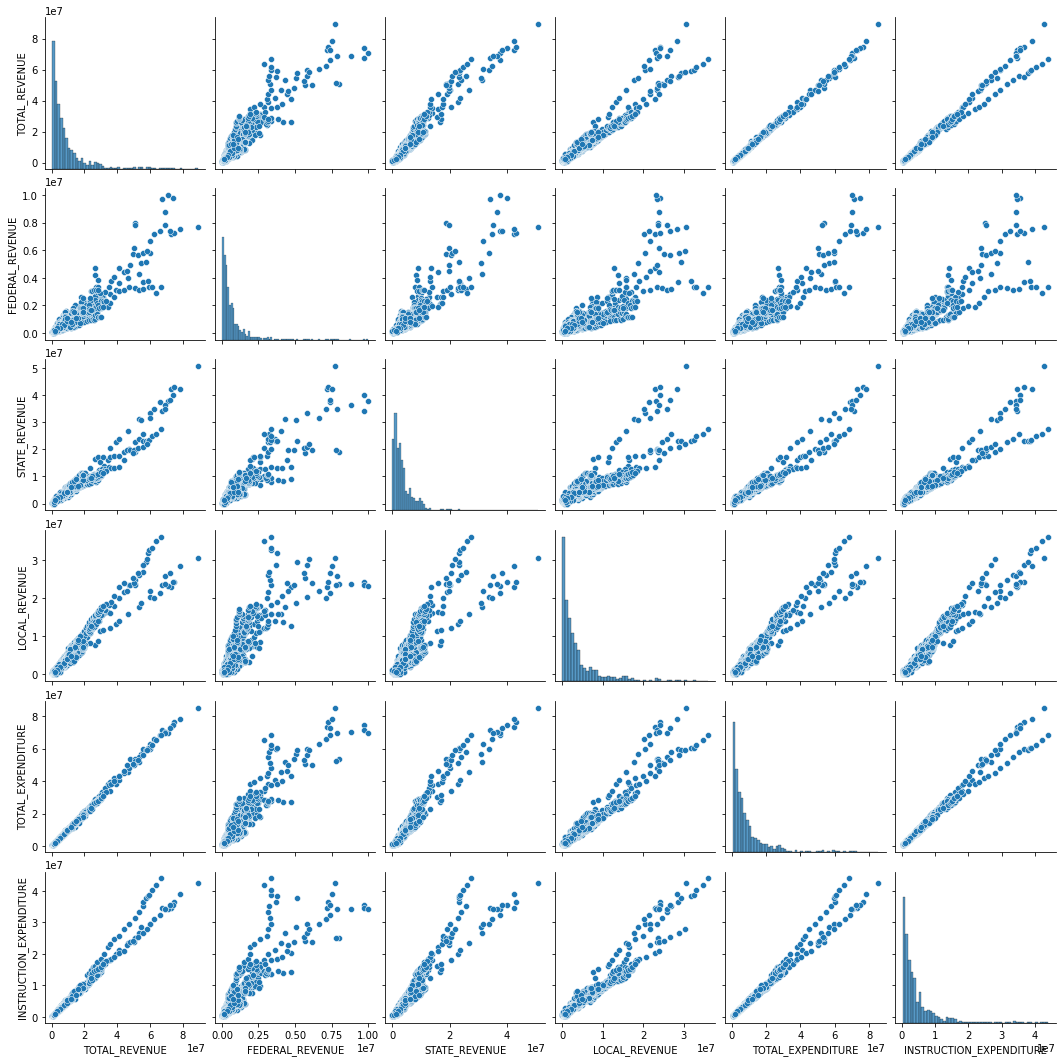

In [16]:
sns.pairplot(states,vars=['TOTAL_REVENUE', 'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE', 'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE'])